## Text Analytics  - Assigment 3

Submitted by - Arjun Varma, Nimish Amlathe, Annying Li, Rachel Wang, Daniel Peng

### Task A

Created weighted and unweighted networks with the sentiment scores using the networkx package. The average positive and negative sentiments were calculated for each car combination as inputs to the pagerank.

In [22]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Loading in the required data
ss = pd.read_csv('Assignment 3 Sentiment Scores.csv')
ss.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [4]:
senti = ss.copy()

# Adding car combinations to the dataframe with the difference in sentiments as the values
for i in range(len(ss.columns)):
    for ii in range(i+1,len(ss.columns)):
            temp = ss.columns[i] +'_'+ss.columns[ii]
            senti[temp]=ss[ss.columns[i]]-ss[ss.columns[ii]]

senti.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass,...,3series_5series,3series_7series,3series_XJ,3series_Sclass,5series_7series,5series_XJ,5series_Sclass,7series_XJ,7series_Sclass,XJ_Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN


In [7]:
# Creating tuples of car1, car2, positive sentiment and negative sentiment
use = []
for q in senti.columns[10:]:
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

use[:10]

[('ES', 'LS', 1.1666666666666667, -2.0),
 ('ES', 'RX', 1.6666666666666667, -2.0),
 ('ES', 'A8', 3.4, -3.0),
 ('ES', 'A6', 6.0, -1.6666666666666667),
 ('ES', '3series', 3.25, -6.0),
 ('ES', '5series', 4.0, -5.0),
 ('ES', '7series', 3.6, -2.8),
 ('ES', 'XJ', 1.0, -1.0),
 ('ES', 'Sclass', 3.2857142857142856, -2.6153846153846154),
 ('LS', 'RX', 3.4, -1.1428571428571428)]

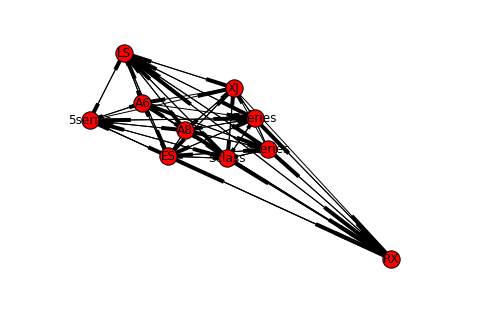

In [18]:
# Creating the weighted network
G = nx.DiGraph()

G.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

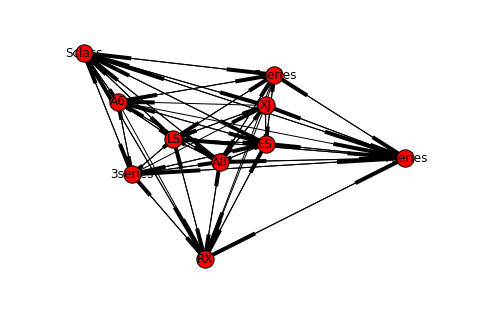

In [14]:
# Creating the unweighted network
G2 = nx.DiGraph()

G2.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G2.add_edge(b,a)
    if neg!=0:
        G2.add_edge(a,b)
        
plt.figure()
nx.draw(G2, with_labels=True)
plt.show()

### Task B

Weighted and unweighted pageranks were calculated for the cars to determine their correlation with sales.

In [31]:
# Weighted pagerank
pr = nx.pagerank(G, alpha=1,weight='weight') # damping factor set to 1 since it is not applicable in case of reviews
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
pr_df

,Model,pr
0,XJ,0.071172
1,Sclass,0.104550
2,7series,0.100471
3,RX,0.106356
4,LS,0.112985
5,A6,0.066700
6,A8,0.098622
7,3series,0.142455
8,ES,0.110495
9,5series,0.086194


In [32]:
# Merging the sales with the pageranks
cs = pd.read_csv('car_sales.csv')
cs = cs.merge(pr_df)
cs

,Model,Sales,pr
0,A6,20000,0.066700
1,A8,12000,0.098622
2,3series,220000,0.142455
3,5series,60000,0.086194
4,7series,14000,0.100471
5,XJ,6600,0.071172
6,ES,135000,0.110495
7,LS,30000,0.112985
8,RX,120000,0.106356
9,Sclass,25000,0.104550


In [33]:
# Checking Pearson and Spearman correlations
print cs.corr()
scipy.stats.spearmanr(cs['pr'], cs['Sales'])

          Sales        pr
Sales  1.000000  0.739425
pr     0.739425  1.000000


SpearmanrResult(correlation=0.72121212121212108, pvalue=0.018573155089460208)

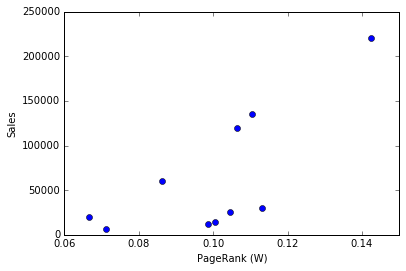

In [43]:
# Observing relationship between page rank and sales
plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')
plt.xlabel("PageRank (W)")
plt.ylabel("Sales")

In [34]:
# Unweighted pagerank
pr2 = nx.pagerank(G2, alpha=1,weight='weight')
pr2_df = pd.DataFrame.from_dict(pr2,orient='index')
pr2_df = pr2_df.reset_index()
pr2_df.columns=['Model','pr2']
pr2_df

,Model,pr2
0,XJ,0.084499
1,Sclass,0.112254
2,7series,0.110868
3,RX,0.106909
4,LS,0.112254
5,A6,0.082711
6,A8,0.112254
7,3series,0.091907
8,ES,0.112254
9,5series,0.074089


In [38]:
# Merging the sales with the pageranks
cs2 = pd.read_csv('car_sales.csv')
cs2 = cs2.merge(pr2_df)
cs2

,Model,Sales,pr2
0,A6,20000,0.082711
1,A8,12000,0.112254
2,3series,220000,0.091907
3,5series,60000,0.074089
4,7series,14000,0.110868
5,XJ,6600,0.084499
6,ES,135000,0.112254
7,LS,30000,0.112254
8,RX,120000,0.106909
9,Sclass,25000,0.112254


In [41]:
# Checking Pearson and Spearman correlations
print cs2.corr()
scipy.stats.spearmanr(cs2['pr2'], cs2['Sales'])

          Sales       pr2
Sales  1.000000 -0.033835
pr2   -0.033835  1.000000


SpearmanrResult(correlation=0.0062530539948072242, pvalue=0.98632197921469589)

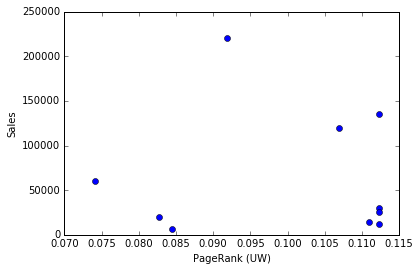

In [42]:
# Observing relationship between page rank and sales
plt.plot(cs2['pr2'], cs2['Sales'], marker='o', linestyle='')
plt.xlabel("PageRank (UW)")
plt.ylabel("Sales")

From the above, we can see that the weighted pagerank scores obtained from car reviews are strong indicators of their sales performance. Unweighted pagerank shows little to no indication. This is because weighted page ranks also capture how much better/worse one car is over another rather than assigning equal weights to every link.